# Mesh-independency Filter
## What is the best Rmin (filter parameter)
#### References
1. Sigmund, O., & Petersson, J. (1998). Numerical instabilities in topology optimization: a survey on procedures dealing with checkerboards, mesh-dependencies and local minima. Structural optimization, 16(1), 68-75.
2. Dimitri Bettebghor

#### Solutions
1. Dimitri: Rmin doit être au minimum de la taille de plusieurs pixels et ne peut pas être trop grand
2. Paper: we should start with a large value of the filter size Rmin ensuring a convex solution and gradually decrease it to end up with a 0-1 design

##### Problem
we have a fixed resolution optimization problem <br>
Following Dimitri's solution Rmin>= n*pixel_size such that n>1

In [2]:
from SetTopol_multiple_loads import TopolSettings
import numpy as np
from scipy.stats.distributions import norm, uniform, bernoulli, poisson
from pyDOE import *

In [3]:
uniform(1.1,10).ppf(lhs(10, samples=1)).reshape(10,)

array([ 4.12878683, 10.55600547,  6.79808899,  7.63356661,  3.76699394,
        8.20552656,  7.97209995,  6.32187478,  2.38726817,  1.81465606])

it.: 1 , obj.: 526.360 Vol.: 0.400, ch.: 0.200
it.: 2 , obj.: 295.401 Vol.: 0.400, ch.: 0.200
it.: 3 , obj.: 219.601 Vol.: 0.400, ch.: 0.200
it.: 4 , obj.: 184.342 Vol.: 0.400, ch.: 0.155
it.: 5 , obj.: 162.850 Vol.: 0.400, ch.: 0.200
it.: 6 , obj.: 139.805 Vol.: 0.400, ch.: 0.200
it.: 7 , obj.: 117.239 Vol.: 0.400, ch.: 0.200
it.: 8 , obj.: 99.195 Vol.: 0.400, ch.: 0.200
it.: 9 , obj.: 88.124 Vol.: 0.400, ch.: 0.161
it.: 10 , obj.: 82.477 Vol.: 0.400, ch.: 0.127
it.: 11 , obj.: 79.686 Vol.: 0.400, ch.: 0.079
it.: 12 , obj.: 78.252 Vol.: 0.400, ch.: 0.065
it.: 13 , obj.: 77.436 Vol.: 0.400, ch.: 0.046
it.: 14 , obj.: 77.008 Vol.: 0.400, ch.: 0.045
it.: 15 , obj.: 76.692 Vol.: 0.400, ch.: 0.033
it.: 16 , obj.: 76.531 Vol.: 0.400, ch.: 0.038
it.: 17 , obj.: 76.372 Vol.: 0.400, ch.: 0.028
it.: 18 , obj.: 76.296 Vol.: 0.400, ch.: 0.031
it.: 19 , obj.: 76.198 Vol.: 0.400, ch.: 0.023
it.: 20 , obj.: 76.156 Vol.: 0.400, ch.: 0.026
it.: 21 , obj.: 76.091 Vol.: 0.400, ch.: 0.019
it.: 22 , obj.:

it.: 16 , obj.: 74.524 Vol.: 0.400, ch.: 0.055
it.: 17 , obj.: 74.324 Vol.: 0.400, ch.: 0.040
it.: 18 , obj.: 74.219 Vol.: 0.400, ch.: 0.048
it.: 19 , obj.: 74.082 Vol.: 0.400, ch.: 0.041
it.: 20 , obj.: 74.012 Vol.: 0.400, ch.: 0.043
it.: 21 , obj.: 73.909 Vol.: 0.400, ch.: 0.043
it.: 22 , obj.: 73.855 Vol.: 0.400, ch.: 0.044
it.: 23 , obj.: 73.772 Vol.: 0.400, ch.: 0.044
it.: 24 , obj.: 73.720 Vol.: 0.400, ch.: 0.043
it.: 25 , obj.: 73.648 Vol.: 0.400, ch.: 0.041
it.: 26 , obj.: 73.600 Vol.: 0.400, ch.: 0.037
it.: 27 , obj.: 73.538 Vol.: 0.400, ch.: 0.033
it.: 28 , obj.: 73.497 Vol.: 0.400, ch.: 0.028
it.: 29 , obj.: 73.447 Vol.: 0.400, ch.: 0.024
it.: 30 , obj.: 73.415 Vol.: 0.400, ch.: 0.020
it.: 31 , obj.: 73.377 Vol.: 0.400, ch.: 0.016
it.: 32 , obj.: 73.353 Vol.: 0.400, ch.: 0.017
it.: 33 , obj.: 73.323 Vol.: 0.400, ch.: 0.013
it.: 34 , obj.: 73.304 Vol.: 0.400, ch.: 0.015
it.: 35 , obj.: 73.280 Vol.: 0.400, ch.: 0.011
it.: 36 , obj.: 73.266 Vol.: 0.400, ch.: 0.013
it.: 37 , obj

it.: 8 , obj.: 74.458 Vol.: 0.400, ch.: 0.200
it.: 9 , obj.: 68.690 Vol.: 0.400, ch.: 0.200
it.: 10 , obj.: 66.039 Vol.: 0.400, ch.: 0.200
it.: 11 , obj.: 64.631 Vol.: 0.400, ch.: 0.200
it.: 12 , obj.: 63.839 Vol.: 0.400, ch.: 0.200
it.: 13 , obj.: 63.408 Vol.: 0.400, ch.: 0.200
it.: 14 , obj.: 63.188 Vol.: 0.400, ch.: 0.200
it.: 15 , obj.: 63.072 Vol.: 0.400, ch.: 0.200
it.: 16 , obj.: 62.997 Vol.: 0.400, ch.: 0.196
it.: 17 , obj.: 62.941 Vol.: 0.400, ch.: 0.189
it.: 18 , obj.: 62.894 Vol.: 0.400, ch.: 0.158
it.: 19 , obj.: 62.849 Vol.: 0.400, ch.: 0.159
it.: 20 , obj.: 62.809 Vol.: 0.400, ch.: 0.146
it.: 21 , obj.: 62.770 Vol.: 0.400, ch.: 0.131
it.: 22 , obj.: 62.730 Vol.: 0.400, ch.: 0.132
it.: 23 , obj.: 62.689 Vol.: 0.400, ch.: 0.120
it.: 24 , obj.: 62.648 Vol.: 0.400, ch.: 0.114
it.: 25 , obj.: 62.602 Vol.: 0.400, ch.: 0.103
it.: 26 , obj.: 62.555 Vol.: 0.400, ch.: 0.095
it.: 27 , obj.: 62.508 Vol.: 0.400, ch.: 0.096
it.: 28 , obj.: 62.455 Vol.: 0.400, ch.: 0.096
it.: 29 , obj.:

it.: 82 , obj.: 72.656 Vol.: 0.400, ch.: 0.001
it.: 83 , obj.: 72.654 Vol.: 0.400, ch.: 0.001
Elapsed time :' 69.66076612472534  s
Saving plot ... 
it.: 1 , obj.: 526.360 Vol.: 0.400, ch.: 0.200
it.: 2 , obj.: 291.996 Vol.: 0.400, ch.: 0.200
it.: 3 , obj.: 214.911 Vol.: 0.400, ch.: 0.200
it.: 4 , obj.: 176.515 Vol.: 0.400, ch.: 0.200
it.: 5 , obj.: 150.861 Vol.: 0.400, ch.: 0.200
it.: 6 , obj.: 121.059 Vol.: 0.400, ch.: 0.200
it.: 7 , obj.: 93.910 Vol.: 0.400, ch.: 0.200
it.: 8 , obj.: 77.630 Vol.: 0.400, ch.: 0.200
it.: 9 , obj.: 70.602 Vol.: 0.400, ch.: 0.200
it.: 10 , obj.: 67.742 Vol.: 0.400, ch.: 0.200
it.: 11 , obj.: 66.356 Vol.: 0.400, ch.: 0.200
it.: 12 , obj.: 65.680 Vol.: 0.400, ch.: 0.184
it.: 13 , obj.: 65.326 Vol.: 0.400, ch.: 0.150
it.: 14 , obj.: 65.115 Vol.: 0.400, ch.: 0.127
it.: 15 , obj.: 64.967 Vol.: 0.400, ch.: 0.107
it.: 16 , obj.: 64.845 Vol.: 0.400, ch.: 0.108
it.: 17 , obj.: 64.740 Vol.: 0.400, ch.: 0.111
it.: 18 , obj.: 64.638 Vol.: 0.400, ch.: 0.107
it.: 19 ,

it.: 72 , obj.: 67.034 Vol.: 0.400, ch.: 0.003
it.: 73 , obj.: 67.035 Vol.: 0.400, ch.: 0.003
it.: 74 , obj.: 67.035 Vol.: 0.400, ch.: 0.003
it.: 75 , obj.: 67.035 Vol.: 0.400, ch.: 0.003
it.: 76 , obj.: 67.036 Vol.: 0.400, ch.: 0.003
it.: 77 , obj.: 67.036 Vol.: 0.400, ch.: 0.003
it.: 78 , obj.: 67.036 Vol.: 0.400, ch.: 0.003
it.: 79 , obj.: 67.036 Vol.: 0.400, ch.: 0.003
it.: 80 , obj.: 67.037 Vol.: 0.400, ch.: 0.003
it.: 81 , obj.: 67.037 Vol.: 0.400, ch.: 0.003
it.: 82 , obj.: 67.037 Vol.: 0.400, ch.: 0.003
it.: 83 , obj.: 67.038 Vol.: 0.400, ch.: 0.003
it.: 84 , obj.: 67.038 Vol.: 0.400, ch.: 0.003
it.: 85 , obj.: 67.039 Vol.: 0.400, ch.: 0.003
it.: 86 , obj.: 67.039 Vol.: 0.400, ch.: 0.003
it.: 87 , obj.: 67.039 Vol.: 0.400, ch.: 0.003
it.: 88 , obj.: 67.039 Vol.: 0.400, ch.: 0.003
it.: 89 , obj.: 67.039 Vol.: 0.400, ch.: 0.003
it.: 90 , obj.: 67.040 Vol.: 0.400, ch.: 0.003
it.: 91 , obj.: 67.040 Vol.: 0.400, ch.: 0.003
it.: 92 , obj.: 67.040 Vol.: 0.400, ch.: 0.003
it.: 93 , obj

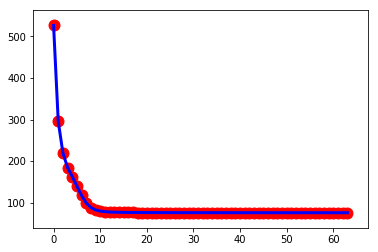

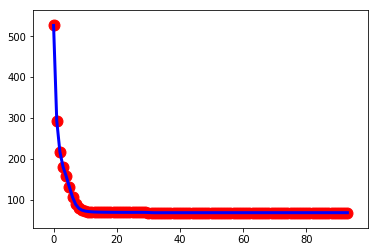

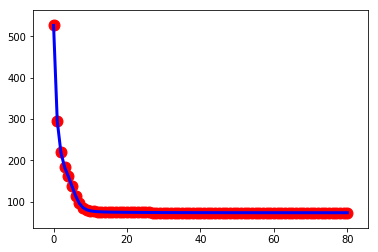

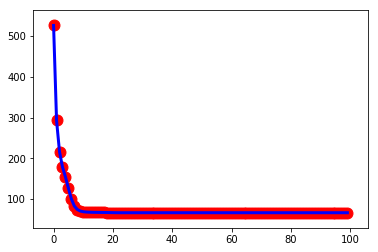

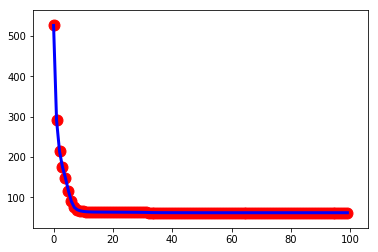

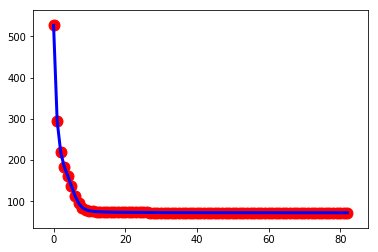

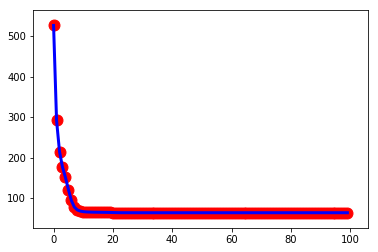

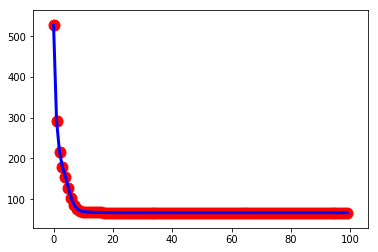

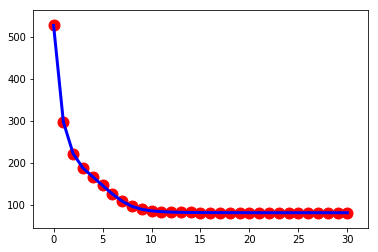

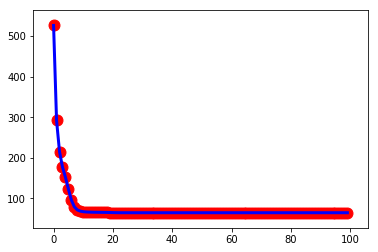

In [10]:
for rmin in  uniform(1.1,10).ppf(lhs(10, samples=1)).reshape(10,): 
    # all left side fixed + 3 loads: one upward in the top-righ corner, one downward in the bottom-left corner , one horizontal in the middle of the right side
    top = TopolSettings(nx = 100, ny = 100, nbr_loads=2, vol = 0.4, rmin = rmin, penalinit = 3.0, penalmed = 3.0, filt = 0, nu=0.3)
    # left side nodes fixed
    list_fixed_nodes =  np.arange(0, top.ny+1).tolist()
    top.fixed = list_fixed_nodes
    ## loads: 
    ## top-right corner : top.nx*(top.ny+1) + upward => 90
    ## bottom-left corner : (top.nx+1)*(top.ny+1)-1 + downward => 180+90
    top.setf(values=[1,1], nodes=[(top.nx+1)*(top.ny+1)-1, top.nx*(top.ny+1) ], tetas=[180+90, 90])
    # Run Optimization
    top.optimize(store=True)
    # Plot Resulting 2D design
    top.plot(name = 'Rmin'+str(rmin).replace('.', '_'))

#### Results
![title](Filter_Size_R_min_Variation.png)

###### Smaller Rmin, better binary design (i.e. less gray scale values)

#### Repeating the same experiment with volume fraction = 0.6 > 0.4

it.: 1 , obj.: 155.959 Vol.: 0.600, ch.: 0.200
it.: 2 , obj.: 96.840 Vol.: 0.600, ch.: 0.200
it.: 3 , obj.: 72.374 Vol.: 0.600, ch.: 0.200
it.: 4 , obj.: 66.871 Vol.: 0.600, ch.: 0.200
it.: 5 , obj.: 60.015 Vol.: 0.600, ch.: 0.200
it.: 6 , obj.: 53.167 Vol.: 0.600, ch.: 0.200
it.: 7 , obj.: 49.641 Vol.: 0.600, ch.: 0.200
it.: 8 , obj.: 47.540 Vol.: 0.600, ch.: 0.200
it.: 9 , obj.: 46.303 Vol.: 0.600, ch.: 0.200
it.: 10 , obj.: 45.574 Vol.: 0.600, ch.: 0.200
it.: 11 , obj.: 45.274 Vol.: 0.600, ch.: 0.200
it.: 12 , obj.: 45.188 Vol.: 0.600, ch.: 0.200
it.: 13 , obj.: 45.164 Vol.: 0.600, ch.: 0.200
it.: 14 , obj.: 45.156 Vol.: 0.600, ch.: 0.200
it.: 15 , obj.: 45.154 Vol.: 0.600, ch.: 0.195
it.: 16 , obj.: 45.154 Vol.: 0.600, ch.: 0.194
it.: 17 , obj.: 45.152 Vol.: 0.600, ch.: 0.170
it.: 18 , obj.: 45.149 Vol.: 0.600, ch.: 0.145
it.: 19 , obj.: 45.143 Vol.: 0.600, ch.: 0.158
it.: 20 , obj.: 45.135 Vol.: 0.600, ch.: 0.135
it.: 21 , obj.: 45.129 Vol.: 0.600, ch.: 0.116
it.: 22 , obj.: 45.12

it.: 75 , obj.: 45.840 Vol.: 0.600, ch.: 0.010
it.: 76 , obj.: 45.841 Vol.: 0.600, ch.: 0.010
it.: 77 , obj.: 45.843 Vol.: 0.600, ch.: 0.010
it.: 78 , obj.: 45.844 Vol.: 0.600, ch.: 0.009
it.: 79 , obj.: 45.846 Vol.: 0.600, ch.: 0.009
it.: 80 , obj.: 45.847 Vol.: 0.600, ch.: 0.009
it.: 81 , obj.: 45.849 Vol.: 0.600, ch.: 0.009
it.: 82 , obj.: 45.850 Vol.: 0.600, ch.: 0.008
it.: 83 , obj.: 45.851 Vol.: 0.600, ch.: 0.008
it.: 84 , obj.: 45.853 Vol.: 0.600, ch.: 0.008
it.: 85 , obj.: 45.854 Vol.: 0.600, ch.: 0.008
it.: 86 , obj.: 45.855 Vol.: 0.600, ch.: 0.008
it.: 87 , obj.: 45.857 Vol.: 0.600, ch.: 0.008
it.: 88 , obj.: 45.858 Vol.: 0.600, ch.: 0.008
it.: 89 , obj.: 45.859 Vol.: 0.600, ch.: 0.008
it.: 90 , obj.: 45.861 Vol.: 0.600, ch.: 0.007
it.: 91 , obj.: 45.862 Vol.: 0.600, ch.: 0.007
it.: 92 , obj.: 45.863 Vol.: 0.600, ch.: 0.007
it.: 93 , obj.: 45.864 Vol.: 0.600, ch.: 0.007
it.: 94 , obj.: 45.866 Vol.: 0.600, ch.: 0.007
it.: 95 , obj.: 45.867 Vol.: 0.600, ch.: 0.006
it.: 96 , obj

it.: 48 , obj.: 46.399 Vol.: 0.600, ch.: 0.005
it.: 49 , obj.: 46.399 Vol.: 0.600, ch.: 0.004
it.: 50 , obj.: 46.398 Vol.: 0.600, ch.: 0.004
it.: 51 , obj.: 46.398 Vol.: 0.600, ch.: 0.003
it.: 52 , obj.: 46.398 Vol.: 0.600, ch.: 0.003
it.: 53 , obj.: 46.397 Vol.: 0.600, ch.: 0.003
it.: 54 , obj.: 46.397 Vol.: 0.600, ch.: 0.002
it.: 55 , obj.: 46.397 Vol.: 0.600, ch.: 0.002
it.: 56 , obj.: 46.397 Vol.: 0.600, ch.: 0.002
it.: 57 , obj.: 46.396 Vol.: 0.600, ch.: 0.002
it.: 58 , obj.: 46.396 Vol.: 0.600, ch.: 0.001
it.: 59 , obj.: 46.396 Vol.: 0.600, ch.: 0.001
it.: 60 , obj.: 46.396 Vol.: 0.600, ch.: 0.001
it.: 61 , obj.: 46.396 Vol.: 0.600, ch.: 0.001
it.: 62 , obj.: 46.395 Vol.: 0.600, ch.: 0.001
it.: 63 , obj.: 46.395 Vol.: 0.600, ch.: 0.001
Elapsed time :' 48.36667585372925  s
Saving plot ... 
it.: 1 , obj.: 155.959 Vol.: 0.600, ch.: 0.200
it.: 2 , obj.: 97.220 Vol.: 0.600, ch.: 0.200
it.: 3 , obj.: 72.961 Vol.: 0.600, ch.: 0.200
it.: 4 , obj.: 67.745 Vol.: 0.600, ch.: 0.200
it.: 5 , 

it.: 11 , obj.: 47.119 Vol.: 0.600, ch.: 0.083
it.: 12 , obj.: 47.087 Vol.: 0.600, ch.: 0.060
it.: 13 , obj.: 47.086 Vol.: 0.600, ch.: 0.047
it.: 14 , obj.: 47.095 Vol.: 0.600, ch.: 0.038
it.: 15 , obj.: 47.106 Vol.: 0.600, ch.: 0.031
it.: 16 , obj.: 47.117 Vol.: 0.600, ch.: 0.025
it.: 17 , obj.: 47.127 Vol.: 0.600, ch.: 0.020
it.: 18 , obj.: 47.135 Vol.: 0.600, ch.: 0.017
it.: 19 , obj.: 47.143 Vol.: 0.600, ch.: 0.014
it.: 20 , obj.: 47.150 Vol.: 0.600, ch.: 0.012
it.: 21 , obj.: 47.156 Vol.: 0.600, ch.: 0.011
it.: 22 , obj.: 47.162 Vol.: 0.600, ch.: 0.010
it.: 23 , obj.: 47.167 Vol.: 0.600, ch.: 0.009
it.: 24 , obj.: 47.172 Vol.: 0.600, ch.: 0.009
it.: 25 , obj.: 47.177 Vol.: 0.600, ch.: 0.008
it.: 26 , obj.: 47.181 Vol.: 0.600, ch.: 0.008
it.: 27 , obj.: 47.185 Vol.: 0.600, ch.: 0.008
it.: 28 , obj.: 47.188 Vol.: 0.600, ch.: 0.007
it.: 29 , obj.: 47.192 Vol.: 0.600, ch.: 0.007
it.: 30 , obj.: 47.195 Vol.: 0.600, ch.: 0.007
it.: 31 , obj.: 47.198 Vol.: 0.600, ch.: 0.006
it.: 32 , obj

it.: 37 , obj.: 48.018 Vol.: 0.600, ch.: 0.002
it.: 38 , obj.: 48.019 Vol.: 0.600, ch.: 0.002
it.: 39 , obj.: 48.020 Vol.: 0.600, ch.: 0.002
it.: 40 , obj.: 48.021 Vol.: 0.600, ch.: 0.002
it.: 41 , obj.: 48.022 Vol.: 0.600, ch.: 0.002
it.: 42 , obj.: 48.023 Vol.: 0.600, ch.: 0.002
it.: 43 , obj.: 48.024 Vol.: 0.600, ch.: 0.001
it.: 44 , obj.: 48.025 Vol.: 0.600, ch.: 0.001
it.: 45 , obj.: 48.026 Vol.: 0.600, ch.: 0.001
it.: 46 , obj.: 48.026 Vol.: 0.600, ch.: 0.001
it.: 47 , obj.: 48.027 Vol.: 0.600, ch.: 0.001
it.: 48 , obj.: 48.028 Vol.: 0.600, ch.: 0.001
it.: 49 , obj.: 48.028 Vol.: 0.600, ch.: 0.001
Elapsed time :' 37.63349771499634  s
Saving plot ... 
it.: 1 , obj.: 155.959 Vol.: 0.600, ch.: 0.200
it.: 2 , obj.: 97.739 Vol.: 0.600, ch.: 0.200
it.: 3 , obj.: 73.811 Vol.: 0.600, ch.: 0.200
it.: 4 , obj.: 69.088 Vol.: 0.600, ch.: 0.188
it.: 5 , obj.: 63.639 Vol.: 0.600, ch.: 0.197
it.: 6 , obj.: 57.288 Vol.: 0.600, ch.: 0.200
it.: 7 , obj.: 52.822 Vol.: 0.600, ch.: 0.200
it.: 8 , obj

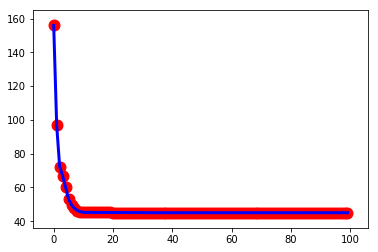

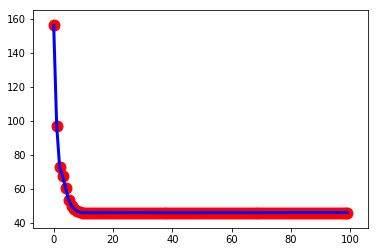

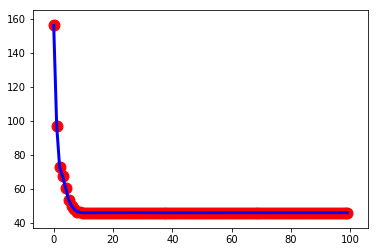

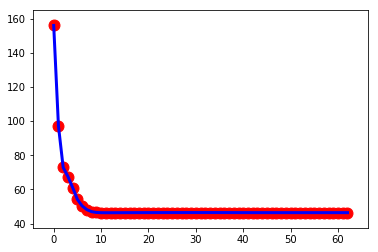

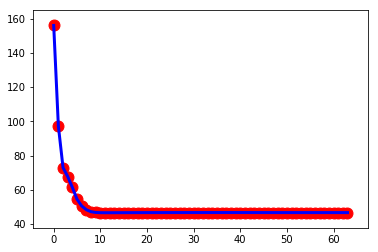

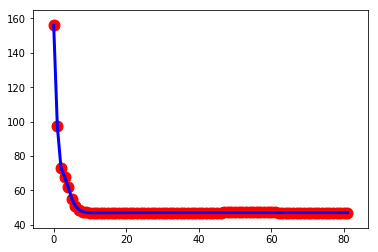

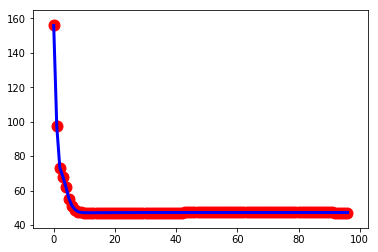

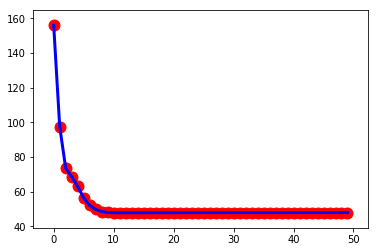

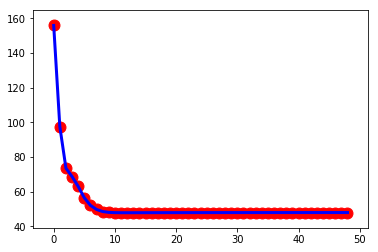

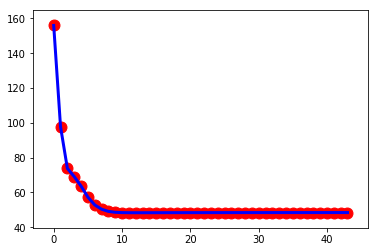

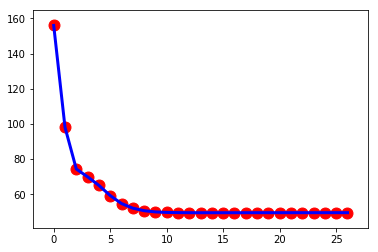

In [12]:

for rmin in  [1.3331960343309615, 2.3995312067125285, 2.7202191864952265, 3.3797463020774434, 3.835797835890612, 4.474599470633136, 4.565377536215799, 5.723929761143266, 5.795290359121605, 6.375286428947458, 7.8362578151147755  ]: 
    # all left side fixed + 3 loads: one upward in the top-righ corner, one downward in the bottom-left corner , one horizontal in the middle of the right side
    top = TopolSettings(nx = 100, ny = 100, nbr_loads=2, vol = 0.6, rmin = rmin, penalinit = 3.0, penalmed = 3.0, filt = 0, nu=0.3)
    # left side nodes fixed
    list_fixed_nodes =  np.arange(0, top.ny+1).tolist()
    top.fixed = list_fixed_nodes
    ## loads: 
    ## top-right corner : top.nx*(top.ny+1) + upward => 90
    ## bottom-left corner : (top.nx+1)*(top.ny+1)-1 + downward => 180+90
    top.setf(values=[1,1], nodes=[(top.nx+1)*(top.ny+1)-1, top.nx*(top.ny+1) ], tetas=[180+90, 90])
    # Run Optimization
    top.optimize(store=True)
    # Plot Resulting 2D design
    top.plot(name = 'Rmin'+str(rmin).replace('.', '_'))

#### Results
![title](Filter_Size_R_min_Variation_Volfrac_0_7.png)

##### now the volume fraction increased, we see the same overall structure but with finer details for the same Rmin

#### Repeating the same experiment with volume fraction = 0.1 < 0.4

it.: 1 , obj.: 33687.026 Vol.: 0.100, ch.: 0.200
it.: 2 , obj.: 15536.314 Vol.: 0.100, ch.: 0.200
it.: 3 , obj.: 11383.588 Vol.: 0.100, ch.: 0.200
it.: 4 , obj.: 9297.159 Vol.: 0.100, ch.: 0.200
it.: 5 , obj.: 7322.453 Vol.: 0.100, ch.: 0.200
it.: 6 , obj.: 5330.672 Vol.: 0.100, ch.: 0.152
it.: 7 , obj.: 3713.912 Vol.: 0.100, ch.: 0.200
it.: 8 , obj.: 2481.682 Vol.: 0.100, ch.: 0.200
it.: 9 , obj.: 1633.137 Vol.: 0.100, ch.: 0.200
it.: 10 , obj.: 1084.540 Vol.: 0.100, ch.: 0.200
it.: 11 , obj.: 732.888 Vol.: 0.100, ch.: 0.200
it.: 12 , obj.: 533.373 Vol.: 0.100, ch.: 0.200
it.: 13 , obj.: 428.035 Vol.: 0.100, ch.: 0.200
it.: 14 , obj.: 372.828 Vol.: 0.100, ch.: 0.200
it.: 15 , obj.: 340.747 Vol.: 0.100, ch.: 0.200
it.: 16 , obj.: 321.546 Vol.: 0.100, ch.: 0.195
it.: 17 , obj.: 309.845 Vol.: 0.100, ch.: 0.141
it.: 18 , obj.: 303.808 Vol.: 0.100, ch.: 0.107
it.: 19 , obj.: 300.872 Vol.: 0.100, ch.: 0.087
it.: 20 , obj.: 299.509 Vol.: 0.100, ch.: 0.074
it.: 21 , obj.: 298.745 Vol.: 0.100,

it.: 71 , obj.: 362.401 Vol.: 0.100, ch.: 0.015
it.: 72 , obj.: 362.405 Vol.: 0.100, ch.: 0.015
it.: 73 , obj.: 362.390 Vol.: 0.100, ch.: 0.015
it.: 74 , obj.: 362.394 Vol.: 0.100, ch.: 0.015
it.: 75 , obj.: 362.380 Vol.: 0.100, ch.: 0.015
it.: 76 , obj.: 362.383 Vol.: 0.100, ch.: 0.014
it.: 77 , obj.: 362.369 Vol.: 0.100, ch.: 0.014
it.: 78 , obj.: 362.372 Vol.: 0.100, ch.: 0.014
it.: 79 , obj.: 362.360 Vol.: 0.100, ch.: 0.014
it.: 80 , obj.: 362.363 Vol.: 0.100, ch.: 0.014
it.: 81 , obj.: 362.352 Vol.: 0.100, ch.: 0.014
it.: 82 , obj.: 362.355 Vol.: 0.100, ch.: 0.014
it.: 83 , obj.: 362.345 Vol.: 0.100, ch.: 0.013
it.: 84 , obj.: 362.348 Vol.: 0.100, ch.: 0.013
it.: 85 , obj.: 362.338 Vol.: 0.100, ch.: 0.013
it.: 86 , obj.: 362.341 Vol.: 0.100, ch.: 0.013
it.: 87 , obj.: 362.333 Vol.: 0.100, ch.: 0.013
it.: 88 , obj.: 362.336 Vol.: 0.100, ch.: 0.013
it.: 89 , obj.: 362.328 Vol.: 0.100, ch.: 0.013
it.: 90 , obj.: 362.330 Vol.: 0.100, ch.: 0.013
it.: 91 , obj.: 362.323 Vol.: 0.100, ch.

it.: 40 , obj.: 545.848 Vol.: 0.100, ch.: 0.094
it.: 41 , obj.: 546.510 Vol.: 0.100, ch.: 0.093
it.: 42 , obj.: 545.647 Vol.: 0.100, ch.: 0.093
it.: 43 , obj.: 546.297 Vol.: 0.100, ch.: 0.093
it.: 44 , obj.: 545.476 Vol.: 0.100, ch.: 0.092
it.: 45 , obj.: 546.111 Vol.: 0.100, ch.: 0.092
it.: 46 , obj.: 545.327 Vol.: 0.100, ch.: 0.091
it.: 47 , obj.: 545.944 Vol.: 0.100, ch.: 0.091
it.: 48 , obj.: 545.195 Vol.: 0.100, ch.: 0.091
it.: 49 , obj.: 545.793 Vol.: 0.100, ch.: 0.091
it.: 50 , obj.: 545.076 Vol.: 0.100, ch.: 0.090
it.: 51 , obj.: 545.655 Vol.: 0.100, ch.: 0.090
it.: 52 , obj.: 544.967 Vol.: 0.100, ch.: 0.089
it.: 53 , obj.: 545.526 Vol.: 0.100, ch.: 0.089
it.: 54 , obj.: 544.866 Vol.: 0.100, ch.: 0.088
it.: 55 , obj.: 545.407 Vol.: 0.100, ch.: 0.088
it.: 56 , obj.: 544.773 Vol.: 0.100, ch.: 0.088
it.: 57 , obj.: 545.294 Vol.: 0.100, ch.: 0.088
it.: 58 , obj.: 544.686 Vol.: 0.100, ch.: 0.087
it.: 59 , obj.: 545.188 Vol.: 0.100, ch.: 0.087
it.: 60 , obj.: 544.604 Vol.: 0.100, ch.

it.: 9 , obj.: 2621.672 Vol.: 0.100, ch.: 0.200
it.: 10 , obj.: 2019.976 Vol.: 0.100, ch.: 0.121
it.: 11 , obj.: 1678.221 Vol.: 0.100, ch.: 0.188
it.: 12 , obj.: 1406.751 Vol.: 0.100, ch.: 0.112
it.: 13 , obj.: 1264.874 Vol.: 0.100, ch.: 0.177
it.: 14 , obj.: 1130.898 Vol.: 0.100, ch.: 0.128
it.: 15 , obj.: 1071.269 Vol.: 0.100, ch.: 0.169
it.: 16 , obj.: 1000.974 Vol.: 0.100, ch.: 0.142
it.: 17 , obj.: 977.969 Vol.: 0.100, ch.: 0.163
it.: 18 , obj.: 938.354 Vol.: 0.100, ch.: 0.148
it.: 19 , obj.: 932.249 Vol.: 0.100, ch.: 0.158
it.: 20 , obj.: 907.384 Vol.: 0.100, ch.: 0.150
it.: 21 , obj.: 909.174 Vol.: 0.100, ch.: 0.155
it.: 22 , obj.: 891.561 Vol.: 0.100, ch.: 0.150
it.: 23 , obj.: 897.084 Vol.: 0.100, ch.: 0.151
it.: 24 , obj.: 883.155 Vol.: 0.100, ch.: 0.148
it.: 25 , obj.: 890.455 Vol.: 0.100, ch.: 0.148
it.: 26 , obj.: 878.490 Vol.: 0.100, ch.: 0.146
it.: 27 , obj.: 886.617 Vol.: 0.100, ch.: 0.145
it.: 28 , obj.: 875.768 Vol.: 0.100, ch.: 0.143
it.: 29 , obj.: 884.253 Vol.: 0.1

it.: 79 , obj.: 911.850 Vol.: 0.100, ch.: 0.082
it.: 80 , obj.: 904.888 Vol.: 0.100, ch.: 0.082
it.: 81 , obj.: 911.646 Vol.: 0.100, ch.: 0.081
it.: 82 , obj.: 904.793 Vol.: 0.100, ch.: 0.080
it.: 83 , obj.: 911.449 Vol.: 0.100, ch.: 0.079
it.: 84 , obj.: 904.702 Vol.: 0.100, ch.: 0.079
it.: 85 , obj.: 911.259 Vol.: 0.100, ch.: 0.078
it.: 86 , obj.: 904.615 Vol.: 0.100, ch.: 0.077
it.: 87 , obj.: 911.075 Vol.: 0.100, ch.: 0.077
it.: 88 , obj.: 904.533 Vol.: 0.100, ch.: 0.076
it.: 89 , obj.: 910.898 Vol.: 0.100, ch.: 0.075
it.: 90 , obj.: 904.455 Vol.: 0.100, ch.: 0.075
it.: 91 , obj.: 910.726 Vol.: 0.100, ch.: 0.074
it.: 92 , obj.: 904.380 Vol.: 0.100, ch.: 0.074
it.: 93 , obj.: 910.561 Vol.: 0.100, ch.: 0.073
it.: 94 , obj.: 904.309 Vol.: 0.100, ch.: 0.072
it.: 95 , obj.: 910.400 Vol.: 0.100, ch.: 0.072
it.: 96 , obj.: 904.242 Vol.: 0.100, ch.: 0.071
it.: 97 , obj.: 910.245 Vol.: 0.100, ch.: 0.071
it.: 98 , obj.: 904.178 Vol.: 0.100, ch.: 0.070
it.: 99 , obj.: 910.095 Vol.: 0.100, ch.

it.: 45 , obj.: 1399.668 Vol.: 0.100, ch.: 0.161
it.: 46 , obj.: 1379.058 Vol.: 0.100, ch.: 0.160
it.: 47 , obj.: 1398.950 Vol.: 0.100, ch.: 0.159
it.: 48 , obj.: 1378.631 Vol.: 0.100, ch.: 0.158
it.: 49 , obj.: 1398.270 Vol.: 0.100, ch.: 0.157
it.: 50 , obj.: 1378.235 Vol.: 0.100, ch.: 0.156
it.: 51 , obj.: 1397.621 Vol.: 0.100, ch.: 0.154
it.: 52 , obj.: 1377.868 Vol.: 0.100, ch.: 0.153
it.: 53 , obj.: 1397.001 Vol.: 0.100, ch.: 0.152
it.: 54 , obj.: 1377.524 Vol.: 0.100, ch.: 0.151
it.: 55 , obj.: 1396.407 Vol.: 0.100, ch.: 0.150
it.: 56 , obj.: 1377.203 Vol.: 0.100, ch.: 0.149
it.: 57 , obj.: 1395.836 Vol.: 0.100, ch.: 0.148
it.: 58 , obj.: 1376.901 Vol.: 0.100, ch.: 0.147
it.: 59 , obj.: 1395.287 Vol.: 0.100, ch.: 0.146
it.: 60 , obj.: 1376.618 Vol.: 0.100, ch.: 0.145
it.: 61 , obj.: 1394.758 Vol.: 0.100, ch.: 0.143
it.: 62 , obj.: 1376.351 Vol.: 0.100, ch.: 0.142
it.: 63 , obj.: 1394.248 Vol.: 0.100, ch.: 0.141
it.: 64 , obj.: 1376.100 Vol.: 0.100, ch.: 0.140
it.: 65 , obj.: 1393

it.: 11 , obj.: 3340.839 Vol.: 0.100, ch.: 0.179
it.: 12 , obj.: 2991.683 Vol.: 0.100, ch.: 0.157
it.: 13 , obj.: 2881.808 Vol.: 0.100, ch.: 0.178
it.: 14 , obj.: 2682.906 Vol.: 0.100, ch.: 0.164
it.: 15 , obj.: 2655.749 Vol.: 0.100, ch.: 0.174
it.: 16 , obj.: 2529.701 Vol.: 0.100, ch.: 0.166
it.: 17 , obj.: 2540.517 Vol.: 0.100, ch.: 0.170
it.: 18 , obj.: 2451.189 Vol.: 0.100, ch.: 0.164
it.: 19 , obj.: 2479.706 Vol.: 0.100, ch.: 0.165
it.: 20 , obj.: 2409.614 Vol.: 0.100, ch.: 0.161
it.: 21 , obj.: 2446.301 Vol.: 0.100, ch.: 0.161
it.: 22 , obj.: 2386.802 Vol.: 0.100, ch.: 0.157
it.: 23 , obj.: 2427.075 Vol.: 0.100, ch.: 0.156
it.: 24 , obj.: 2373.814 Vol.: 0.100, ch.: 0.153
it.: 25 , obj.: 2415.421 Vol.: 0.100, ch.: 0.151
it.: 26 , obj.: 2366.137 Vol.: 0.100, ch.: 0.149
it.: 27 , obj.: 2407.957 Vol.: 0.100, ch.: 0.147
it.: 28 , obj.: 2361.445 Vol.: 0.100, ch.: 0.144
it.: 29 , obj.: 2402.917 Vol.: 0.100, ch.: 0.142
it.: 30 , obj.: 2358.507 Vol.: 0.100, ch.: 0.140
it.: 31 , obj.: 2399

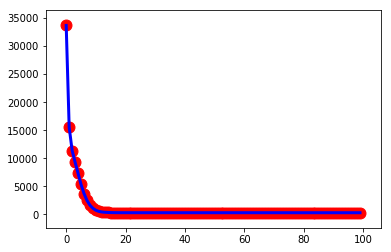

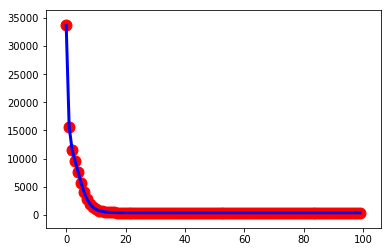

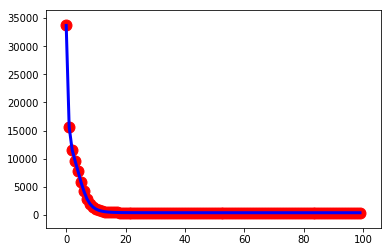

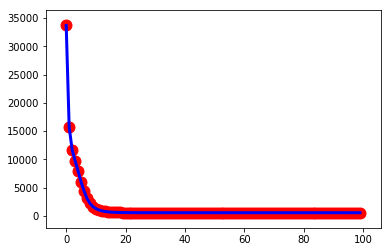

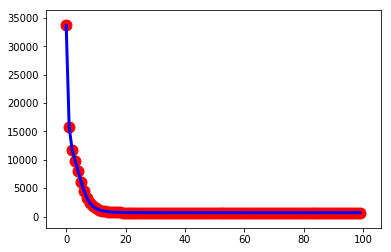

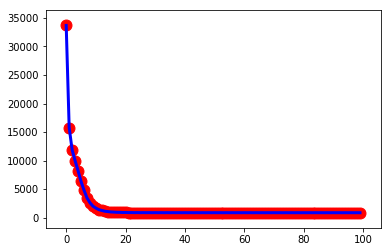

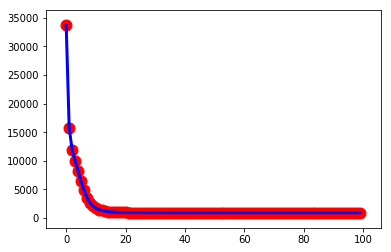

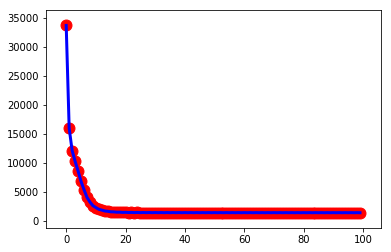

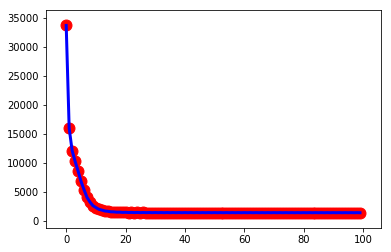

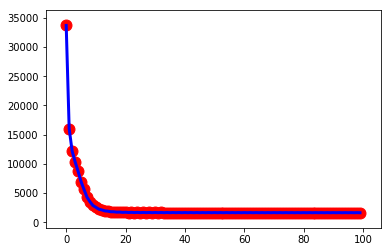

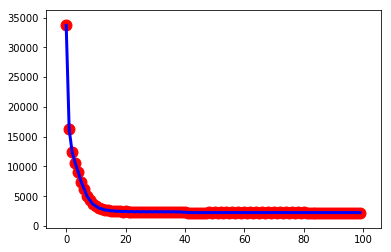

In [13]:
for rmin in  [1.3331960343309615, 2.3995312067125285, 2.7202191864952265, 3.3797463020774434, 3.835797835890612, 4.474599470633136, 4.565377536215799, 5.723929761143266, 5.795290359121605, 6.375286428947458, 7.8362578151147755  ]: 
    # all left side fixed + 3 loads: one upward in the top-righ corner, one downward in the bottom-left corner , one horizontal in the middle of the right side
    top = TopolSettings(nx = 100, ny = 100, nbr_loads=2, vol = 0.1, rmin = rmin, penalinit = 3.0, penalmed = 3.0, filt = 0, nu=0.3)
    # left side nodes fixed
    list_fixed_nodes =  np.arange(0, top.ny+1).tolist()
    top.fixed = list_fixed_nodes
    ## loads: 
    ## top-right corner : top.nx*(top.ny+1) + upward => 90
    ## bottom-left corner : (top.nx+1)*(top.ny+1)-1 + downward => 180+90
    top.setf(values=[1,1], nodes=[(top.nx+1)*(top.ny+1)-1, top.nx*(top.ny+1) ], tetas=[180+90, 90])
    # Run Optimization
    top.optimize(store=True)
    # Plot Resulting 2D design
    top.plot(name = 'Rmin'+str(rmin).replace('.', '_'))

#### Results
![title](Filter_Size_R_min_Variation_Volfrac_0_1.png)

##### now the volume fraction decreased, we see the same overall structure with no extra details for the same Rmin

### Conclusion
1. for a 100x100 resolution image, Rmin is better in the range of [2,3]
2. with higher volume fraction, Rmin should be higher i.e. [3,4]
3. with lower volume fraction, Rmin should be lower i.e. [1.1,3]